In [29]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

df = pd.read_csv("adult.csv", names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"])


In [104]:
print df['age'].mean()
print df['age'].median()
print sp.stats.mode(df['age'])[0][0]

38.5816467553
37.0
36


In [106]:
print df['education-num'].mean()
print df['education-num'].median()
print sp.stats.mode(df['education-num'])[0][0]

10.0806793403
10.0
9


In [105]:
print df['hours-per-week'].mean()
print df['hours-per-week'].median()
print sp.stats.mode(df['hours-per-week'])[0][0]

40.4374558521
40.0
40


In [19]:
e3 = df.groupby('age').mean()[['education-num', 'hours-per-week']]
print e3.head()

     education-num  hours-per-week
age                               
17        6.648101       21.367089
18        8.152727       25.912727
19        9.096910       30.678371
20        9.345286       32.280212
21        9.434722       34.034722


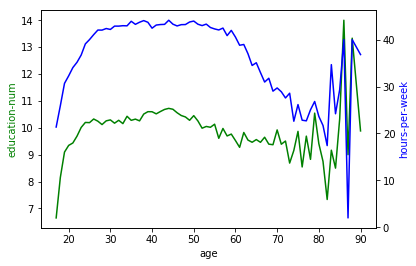

In [28]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(e3.index, e3['education-num'], 'g-')
ax2.plot(e3.index, e3['hours-per-week'], 'b-')
ax1.set_xlabel('age')
ax1.set_ylabel('education-num', color='g')
ax2.set_ylabel('hours-per-week', color='b')
plt.show()

In [84]:
lm = linear_model.LinearRegression()
model = lm.fit(df['age'].values.reshape(-1,1), df['education-num'])
print "a1 = ", lm.coef_[0], " b1 = ", lm.intercept_
print "Predicted education-num of a 21-year-old person: ", model.predict(pd.DataFrame([[21]]))[0]

lm = linear_model.LinearRegression()
model = lm.fit(df['age'].values.reshape(-1,1), df['hours-per-week'])

print "a2 = ", lm.coef_[0], " b2 = ", lm.intercept_
print "Predicted hours-per-week of a 21-year-old person: ", model.predict(pd.DataFrame([[21]]))[0]

a1 =  0.00688938878136  b1 =  9.81487537599
Predicted education-num of a 21-year-old person:  9.9595525404
a2 =  0.0622382165376  b2 =  38.036202967
Predicted hours-per-week of a 21-year-old person who has 31 years in education-num:  39.3432055142


In [107]:
lm = linear_model.LinearRegression()
model = lm.fit(df[['age', 'education-num']].values.reshape(-1,2), df['hours-per-week'])
print "a = ", lm.intercept_, " b = ", lm.coef_[0], " c = ", lm.coef_[1]
print "Predicted hours-per-week of a 21-year-old person who has 31 years in education-num: ", model.predict(pd.DataFrame([[21, 31]]))[0]

a =  31.1679925104  b =  0.0574171902632  c =  0.699775615423
Predicted hours-per-week of a 21-year-old person who has 31 years in education-num:  54.0667975841


In [149]:
import statsmodels.api as sm

df = pd.read_csv('breast.csv', index_col=0, names=['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'])
df = pd.get_dummies(df, columns=['Class'], drop_first = True)

df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'], errors='coerce')
df['Bare Nuclei'] = df['Bare Nuclei'].fillna(df['Bare Nuclei'].median())
df['Bare Nuclei'] = df['Bare Nuclei'].astype(int)

lgr = sm.Logit(df.loc[:, 'Class_4'], df.iloc[:, :9])
result = lgr.fit()

print result.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Class_4   No. Observations:                  699
Model:                          Logit   Df Residuals:                      690
Method:                           MLE   Df Model:                            8
Date:                Mon, 19 Mar 2018   Pseudo R-squ.:                    -inf
Time:                        21:10:00   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                       -75244.
                                        LLR p-value:                     1.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Clump Thickness                -0.3365      0.057     -5.915      0.000      -0